In [83]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [84]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train data: ',train.shape)
print('test data: ',test.shape)

train data:  (891, 12)
test data:  (418, 11)


In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

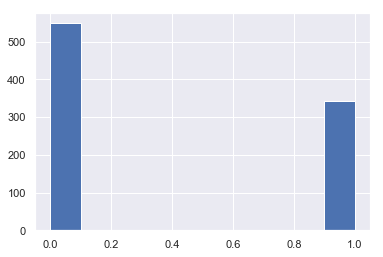

In [86]:
plt.hist(train['Survived'])

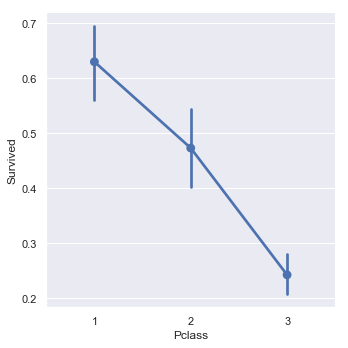

In [87]:
sns.catplot(x="Pclass", y="Survived", kind="point", data=train)

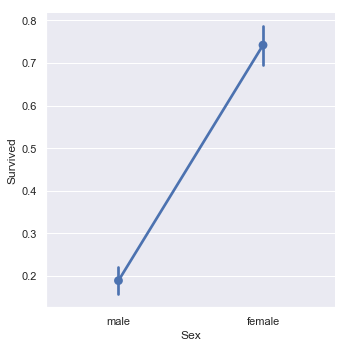

In [88]:
sns.catplot(x="Sex", y="Survived", kind="point", data=train)

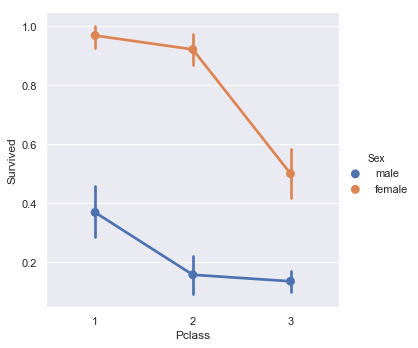

In [89]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", data=train)

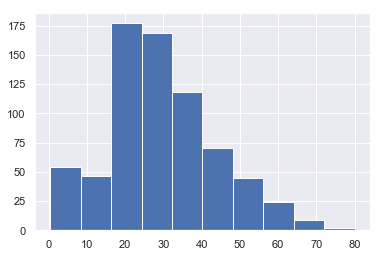

In [90]:
train['Age'].hist()

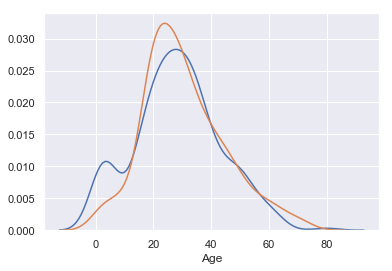

In [91]:
x1 = train.loc[train.Survived == 1,'Age'].dropna()
x2 = train.loc[train.Survived == 0,'Age'].dropna()
sns.distplot(x1, hist=False)
sns.distplot(x2, hist=False)

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.      ,  10.246584,  20.493168,  30.739752,  40.986336,
         51.23292 ,  61.479504,  71.726088,  81.972672,  92.219256,
        102.46584 , 112.712424, 122.959008, 133.205592, 143.452176,
        153.69876 , 163.945344, 174.191928, 184.438512, 194.685096,
        204.93168 , 215.178264, 225.424848, 235.671432, 245.918016,
        256.1646  , 266.411184, 276.657768, 286.904352, 297.150936,
        307.39752 , 317.644104, 327.890688, 338.137272, 348.383856,
        358.63044 , 368.877024, 379.123608, 389.370192, 399.616776,
        409.86336 , 420.109944, 430.356528, 440.603112, 450.849696,
        461.09628 , 471.342864, 481.589448, 49

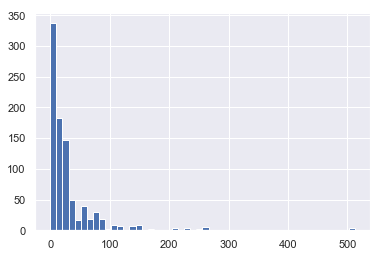

In [92]:
fare = train['Fare'].dropna()
plt.hist(fare, bins=50)

In [93]:
logfare = np.log(fare+1)
train['logfare'] = logfare

In [94]:
train['logfare'].describe()

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: logfare, dtype: float64

In [106]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
logfare          0
dtype: int64

In [102]:
train['Cabin'].fillna('No Cabin', inplace=True)

In [104]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [105]:
train['Embarked'].fillna('S', inplace=True)

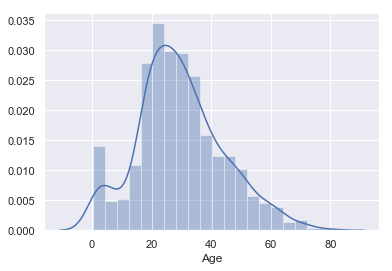

In [107]:
sns.distplot(train['Age'].dropna())

In [110]:
train['Age'].isnull().sum()

177

In [114]:
age_mean = train['Age'].mean()
age_std = train['Age'].std()
print('Age mean:',age_mean)
print('Age std:',age_std)

Age mean: 29.69911764705882
Age std: 14.526497332334044


In [115]:
nmissing_age = train['Age'].isnull().sum()

In [118]:
age_random = list(map(int, np.random.normal(age_mean, age_std, nmissing_age)))

In [127]:
train['Age'][train['Age'].isnull()] = age_random

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
logfare        0
dtype: int64

In [131]:
train['FamilySize'] = train['SibSp']+train['Parch']+1

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logfare,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,2.110213,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,2.188856,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,2.202765,1


In [133]:
train['IsAlone'] = 0
train.loc[train['FamilySize']==1,'IsAlone'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logfare,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,2.110213,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,2.188856,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,2.202765,1,1


In [146]:
train.loc[train['Cabin']=='No Cabin','Cabin'] = np.nan

In [150]:
train['Cabin'] = train['Cabin'].astype(str)
train['Cabin'].dtype

dtype('O')

In [151]:
train['CabinType'] = train['Cabin'].apply(lambda x: x[0])

In [152]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logfare,FamilySize,IsAlone,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,2.110213,2,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,2,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,2.188856,1,1,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,2,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,2.202765,1,1,n


In [157]:
train['CabinType'].value_counts()

No Cabin    687
C            59
B            47
D            33
E            32
A            15
F            13
GT            5
Name: CabinType, dtype: int64

In [154]:
train.loc[train['CabinType']=='n','CabinType'] = 'No Cabin'

In [156]:
train.loc[train['CabinType']=='G','CabinType'] = 'GT'
train.loc[train['CabinType']=='T','CabinType'] = 'GT'

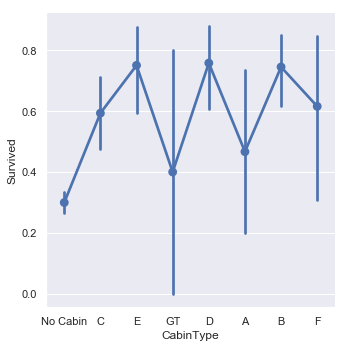

In [158]:
sns.catplot(x="CabinType",y="Survived",kind="point",data=train)

In [159]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logfare,FamilySize,IsAlone,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,2.110213,2,0,No Cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,2,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,2.188856,1,1,No Cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,2,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,2.202765,1,1,No Cabin


In [171]:
train['Sex'] = train['Sex'].map({'male':1,'female':0})
#train['Sex'] = train['Sex'].astype(str)

In [173]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logfare,FamilySize,IsAlone,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,nan,S,2.110213,2,0,No Cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,2,0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,2.188856,1,1,No Cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3.990834,2,0,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,nan,S,2.202765,1,1,No Cabin


In [176]:
X = train[['Pclass','Sex','Age','SibSp','Parch','Embarked','logfare','FamilySize','IsAlone','CabinType']]
y = train['Survived']

In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [205]:
X[:,0]

array([ 0.82737724, -1.56610693,  0.82737724, -1.56610693,  0.82737724,
        0.82737724, -1.56610693,  0.82737724,  0.82737724, -0.36936484,
        0.82737724, -1.56610693,  0.82737724,  0.82737724,  0.82737724,
       -0.36936484,  0.82737724, -0.36936484,  0.82737724,  0.82737724,
       -0.36936484, -0.36936484,  0.82737724, -1.56610693,  0.82737724,
        0.82737724,  0.82737724, -1.56610693,  0.82737724,  0.82737724,
       -1.56610693, -1.56610693,  0.82737724, -0.36936484, -1.56610693,
       -1.56610693,  0.82737724,  0.82737724,  0.82737724,  0.82737724,
        0.82737724, -0.36936484,  0.82737724, -0.36936484,  0.82737724,
        0.82737724,  0.82737724,  0.82737724,  0.82737724,  0.82737724,
        0.82737724,  0.82737724, -1.56610693, -0.36936484, -1.56610693,
       -1.56610693, -0.36936484,  0.82737724, -0.36936484,  0.82737724,
        0.82737724, -1.56610693, -1.56610693,  0.82737724, -1.56610693,
        0.82737724, -0.36936484,  0.82737724,  0.82737724,  0.82

In [179]:
X = pd.get_dummies(X)
X.head()

,Pclass,Sex,Age,SibSp,Parch,logfare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,CabinType_A,CabinType_B,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_GT,CabinType_No Cabin
0,3,1,22.0,1,0,2.110213,2,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,4.280593,2,0,1,0,0,0,0,1,0,0,0,0,0
2,3,0,26.0,0,0,2.188856,1,1,0,0,1,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,3.990834,2,0,0,0,1,0,0,1,0,0,0,0,0
4,3,1,35.0,0,0,2.202765,1,1,0,0,1,0,0,0,0,0,0,0,1


In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

max_depths = [9,10,11]
for max_depth in max_depths:
    clf = RandomForestClassifier(n_estimators=1000,max_depth=max_depth,random_state=0)
    clf.fit(X_train, y_train)
    yp = clf.predict(X_test)

    accuracy = accuracy_score(y_test, yp)

    print('Accuracy: ', accuracy)

Accuracy:  0.8151260504201681
Accuracy:  0.8235294117647058
Accuracy:  0.8207282913165266


In [357]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


#clf = XGBClassifier(n_estimators=1000, learning_rate=.01)
Cs = [1,2,3,4,5,6,7,8,9,10]
for C in Cs:
    clf = SVC(gamma='auto',C=C)
    scores = cross_val_score(clf,X,y,cv=4,scoring="accuracy")

    print('Accuracy: ', scores.mean())

Accuracy:  0.7979719088883888
Accuracy:  0.8159396083303033
Accuracy:  0.817085798763209
Accuracy:  0.8170908035678215
Accuracy:  0.8170807488702668
Accuracy:  0.8170807488702668
Accuracy:  0.8159646774416954
Accuracy:  0.8170908035678215
Accuracy:  0.8148385513155693
Accuracy:  0.8159646774416954


In [349]:
scores.mean()

0.8126013585654841